In [256]:
import math; 
import statistics;
from IPython.display import Image

<h1> IEE534 Assignment 1 </h1>

<h2> Question 1 </h2>

<h3> 1. The Kirei-Hana Japanese Steak House in San Francisco consumes 3000 pounds of sirloin steak each month. Yama Hirai, the new restraurant manager, recently completed an MBA degree. He learned that the steak was replenished using an EOQ value of 2000 pounds. This EOQ value was computed assuming an interest rate of 36 percent per year. Assume that the current cost of the sirloin steak to the steak house is $4 per pound. </h3>

<h4> 
    (a) What is the setup cost used in determining the EOQ value?
</h4>

In [2]:
#setup cost = ordering fee*(Demand/Quantity) = K*(D/Q)

d = 3000; #per month
D = 12*3000; #per year
EOQ = 2000;
#K = ?; not sure
i = 0.36;
c = 4; #dollars/lb

#EOQ = sqrt([2*K*D] / [i*c]) where i = holding cost & c = unit cost
#EOQ^2 * (ic)= 2*K*D
#K = (EOQ^2*i*c)/(2*D)

K = ((EOQ*EOQ)*i*c)/(2*D)
print("Setup Cost =",K, "dollars per pound")


Setup Cost = 80.0 dollars per pound


<h4>
(b) Mr. Hirai received an offer from a meat wholesaler in which a discount of 5 percent would be given if the steak house purchased steak in quantities of 3000 pounds or more. Should Mr. Hirai accept the offer from the wholesaler? If so, how much can be saved?
</h4>

In [3]:
c1 = 4;
c2 = .95*4;

EOQ_c1 = math.sqrt((2*K*D)/(i*c1))
EOQ_c2 = math.sqrt((2*K*D)/(i*c2))
print("EOQ(c1) = ",EOQ_c1, "and EOQ(c2)",EOQ_c2,"\n")
print("Because EOQ(c2) is < 3000 it is not realizable, thus: \n")

TC_c1 = ((K*(D/EOQ_c1)) + c1*D + i*c1*(EOQ_c1/2))
TC_3000 = ((K*(D/3000)) + c2*D + i*c2*(3000/2))

print("TC(c1) = ",TC_c1, "and TC(3000)",TC_3000,"\n")

Savings = TC_c1 - TC_3000;
print("Mr. Hirai should accept the offer because",Savings,
     "could be saved every year.")

EOQ(c1) =  2000.0 and EOQ(c2) 2051.9567041703085 

Because EOQ(c2) is < 3000 it is not realizable, thus: 

TC(c1) =  146880.0 and TC(3000) 139812.0 

Mr. Hirai should accept the offer because 7068.0 could be saved every year.


<h2> Question 2 </h2>

<h3> 
A company uses 1500 units per year of a certain subassembly that has an annual holding cost of \$45 per unit. Placing an order costs \$150 and the lead time between the order placement and its delivery to the company is 26 working days. Answer the following questions assuming that the annual business year is equal to 300 days.
</h3>

<h4> 
(a) Calculate the Economic Order Quantity (EOQ) for the subassembly 
</h4>

In [22]:
D = 1500;
K = 150;
h = 45;
EOQ = math.sqrt((2*K*D)/(h));
Q=EOQ;
print("EOQ = ",EOQ)

EOQ =  100.0


<h4> (b) Calculate the optimal reorder level.
 </h4>

In [25]:
T = Q/D;
print("order every",T, "years")

order every 0.06 years


<h4> (c) Calculate the average inventory on order. (Hint: To calculate the average inventory on order, draw inventory
on order versus time. Calculate the amount of inventory on order in each “cycle” to determine the appropriate
average level over time.) </h4>

In [32]:
ExpectedInventoryPerDay = 1500/300;
DaysUntilReorder = T*300
InventoryNeededDuringLeadTime = 26*5;
InventoryNeededDuringCycle = 18*5;
AvgInventoryOnOrder = InventoryNeededDuringLeadTime + InventoryNeededDuringCycle;
print("Average Inventory on order is",AvgInventoryOnOrder)

Average Inventory on order is 220


<h4> (d) What is the resulting optimal annual holding + setup cost?
 </h4>

In [33]:
AnnualHolding = h*(Q/2)

#K = (EOQ^2*i*c)/(2*D)
SetupCost = ((EOQ*EOQ)*h)/(2*D)

Total = AnnualHolding + SetupCost;
print("Resulting Optimal Annual Holding + Setup Cost is",Total)

Resulting Optimal Annual Holding + Setup Cost is 2175.0


<h4> (e) Suppose that the company does not want to spend more than an average of $1275 for fixed costs of ordering
per year. What ordering quantity should they use in this case? </h4>

In [37]:
OrderingCost = 150;
FixedCostLimit = 1275;
NumberOfOrders = math.floor(FixedCostLimit/OrderingCost);
FinalOrderQuantity = math.ceil(D/NumberOfOrders);
print("In this case they should use the ordering quantity of",FinalOrderQuantity)

In this case they should use the ordering quantity of 188


<h4>
(f) Suppose that the supplier is now offering the following delivery schedule: 40% of the order will be delivered
immediately and the remaining 60% of the order will be delivered 10 days after the order. Find an ordering
quantity that minimizes the average annual holding cost.
</h4.

In [42]:
#Assuming an extension of part (e):
#Technically to minimize holding cost you would have to maximize ordering cost
#Thus:
DailyNeed = 1500/300;
TenDayNeed = DailyNeed*10;
RemainingNeed = TenDayNeed*(3/2);
TotalOrderQuantity = TenDayNeed + RemainingNeed
print("Ordering Quantity that minimizes holding cost is",TotalOrderQuantity)

Ordering Quantity that minimizes holding cost is 125.0


<h2> Question 3 </h2>

<h3> A farm tractor manufacturing company called HNC in Detroit, Michigan is using a special environment friendly
engine in its brand new tractor model. The tractor sales for this model show a fairly steady demand of 5,600
tractors per year. HNC purchases these engines from an engine producer in Detroit area at a price of \$4,000.
This supplier sends the engines in batches of 100 immediately when HNC orders (i.e., zero lead time). It costs
HNC \$10,000 to place an order. Inventory holding costs are based on an annual interest rate of 20% and HNC
works 50 weeks in a year.
</h3>

<h4> 
(a) Find the current cycle time between the orders (i.e., length of the reorder interval).
</h4>


In [96]:
D = 5600;
c = 4000;
Q = 100;
K = 10000;
i = .2;
h = i*c;
SalesPerDay = 5600/(50*7)
CycleTime = (Q/SalesPerDay);
print("Current cycle time between orders is",CycleTime,"days")

Current cycle time between orders is 6.25 days


<h4>
(b) Suppose there is a positive lead-time for delivery of the engines from supplier. Calculate the reorder point
R if the promised lead time is one week.

</h4>

In [99]:
#from the notes: R = 1/2T * D
LeadTime = 7; #days
QuantityNeededDuringLeadTime = SalesPerDay*7;
print("The reorder point is",QuantityNeededDuringLeadTime,"units")

The reorder point is 112.0 units


<h4>
(c) HNC realized that ordering batches of 100 is not the optimal policy. Find (a) the optimal number of engines
to order (i.e., the EOQ value), and (b) the optimal reorder interval.
</h4>

In [105]:
EOQ = math.floor(math.sqrt((2*K*D)/(h)));
#Assuming the lead time from the above problem is still active
NewReorderPoint = EOQ - QuantityNeededDuringLeadTime;
Optimal_RV = math.floor(NewReorderPoint/SalesPerDay);
print("The optimal number of engines to order (EOQ) is",Optimal_EOQ,
     "And the optimal reorder interval is",Optimal_RV,"days")

The optimal number of engines to order (EOQ) is 374 And the optimal reorder interval is 16 days


<h4>
(d) How much more does it cost HNC to use Q = 100 instead of the EOQ that you calculated in part (c)?

</h4>

In [111]:
C_Q100 = ((K*D)/100)+(c*D)+(h*(100/2));
C_Q374 = ((K*D)/374)+(c*D)+(h*(374/2));
TC = round(C_Q100 - C_Q374);

print("Using Q=100 instead of the EOQ from part c costs",TC,"more dollars")

Using Q=100 instead of the EOQ from part c costs 300667 more dollars


<h4>
(e) Suppose that the engine supplier is offering a quantity discount applied to all units with the following
schedule. If the ordering quantity, Q, is less than 200, then the unit price is \$4,000. If a quantity between
200 and 399 is purchased, then the unit price is \$3,800. And finally, if 400 or more units are ordered, the
unit price is equal to $3,400. What is the optimal order quantity in this case?
</h4>

In [121]:
c1 = c;
c2 = 3800;
c3 = 3400;
h1 = i*c1;
h2 = i*c2;
h3 = i*c3;

EOQ_c1 = math.sqrt((2*K*D)/(i*c1));
EOQ_c2 = math.sqrt((2*K*D)/(i*c2));
EOQ_c3 = math.sqrt((2*K*D)/(i*c3));

# all three values are realizable, thus:

TC_100 = round(((K*D)/100)+(c1*D)+(h1*(100/2)));
TC_374 = round(((K*D)/374)+(c2*D)+(h2*(374/2)));
TC_406 = round(((K*D)/406)+(c3*D)+(h3*(406/2)));

new_list = [TC_100,TC_374,TC_400];
OptOrderQuant = min(new_list);

#print(new_list);
#print(EOQ_c1,EOQ_c2,EOQ_c3)
print("The optimal order quantity in this case is 400")

The optimal order quantity in this case is 400


<h4>
(f) Now, suppose that HNC decided to consider the option of producing the engines in-house. The production
capacity allows HNC to produce 11,200 engines per year. The cost of starting a production run is \$4,000
but each engine cost them half the price of outsourcing (namely \$2,000 per engine). Should HNC make
the engines in-house, or buy them from the supplier? Substantiate your answer by comparing the optimal
annual costs of each option. (Hint: To answer this question, make use of the Economic Production Lotsizing
(EPL) model)
</h4>

In [126]:
D = 5600;
K = 4000;
c = 2000;
i = .2;
h = i*c;
P = 11200;

#EPL model -> Q = sqrt((2*K*D)/(h*(1-D/P)))
Q_star = round(math.sqrt((2*K*D)/(h*(1-(D/P))))); #this is realizable
TC = round(((K*D)/Q_star)+(c*D)+(h*(Q_star/2)));

print("The Optimal Annual Costs of Outsourcing vs In House are",TC,"and",
     TC_406,"respectively. So HNC should build them in house")

The Optimal Annual Costs of Outsourcing vs In House are 11341957 and 19315971 respectively. So HNC should build them in house


<h2> Question 4 </h2>

<h3>  
Executive Office Supply Co. is offering all-unit discounts on the purchase of boxes of letter-size envelopes. If the order size is 0 to 1,299, the buyer receives no discount and each box costs \$10.00. If the order size is 1,300 to
1,799, then the buyer receives a discount and each box costs $8.00. If the order size is 1,800 or above, the buyer receives a discount and each box costs \$7.00.
</h3>
<br/>
<h3>
PK Worldwide Overnight Express is contemplating a large quantity purchase from Executive Office Supply Co. Her company has more than a thousand locations throughout the world and each location needs envelopes. PK estimates that her company’s annual demand for envelopes is 10,000 boxes, the inventory holding costs are computed using a 20% annual interest rate, and the ordering costs are \$150 per order. The following table includes EOQ calculations for this problem.
</h3>

<h4> 
(a) Complete the missing information indicated with the question mark (?) in the table.
</h4>


In [222]:
c0 = 10;
c1 = 8;
c2 = 7;
D = 10000;
i = .2
h0 = i*c0;
h1 = i*c1;
h2 = i*c2;
K = 150;

TC0QandEOQ0_1225 = round(((K*D)/1225)+(c0*D)+(h0*(1225/2)),2);
EOQ1 = round(math.sqrt((2*K*D)/(h1)));
TC2QandBP1 = round(((K*D)/1300)+(c2*D)+(h2*(1300/2)),2);
print("The ? at [1x1] =",TC0QandEOQ0_1225,"\nThe ? below EOQ1 =",EOQ1,
     "\nThe ? at [3x4] =",TC2QandBP1);

The ? at [1x1] = 102449.49 
The ? below EOQ1 = 1369 
The ? at [3x4] = 72063.85


<h4>
(b) Outline below how you would find the optimal ordering quantity for PK Worldwide Overnight Express in
the minimum number of steps. Put each calculation/operation in one step. Note that points will be
deducted for any unnecessary steps in your algorithm.
Step 1.
Step 2.
Step 3.
Step 4.
Step 5.

</h4>

In [230]:
print("Step 1:\n","Find minimum EOQ and TC overlap where EOQ is realizable\n\n")
print("Step 2:\n","Divide the Demand by the value found in step 1")


Step 1:
 Find minimum EOQ and TC overlap where EOQ is realizable


Step 2:
 Divide the Demand by the value found in step 1


<h4>
(c) What is the optimal ordering quantity?

</h4>

In [225]:
#EOQ_2 is not realizable
TC2QandEOQ1 = 72053.99;
OOQ = round(D/TC2QandEOQ1,2);
print("The optimal ordering quantity = ",OOQ);

The optimal ordering quantity =  0.14


<h4>
(d) Executive Office Supply Co. has changed the discount policy to an incremental-discounting scheme.
</h4>
<br />
<h5>
i. Determine the average purchasing cost function (i.e., what we called P C(Q)/Q function for each range
of ordering quantity)
</h5>
<h5>
ii. As before, fill in the blanks in the table. 
</h5>
<br />
<h5>
iii. As before, outline below how you would find the optimal ordering quantity for PK Worldwide Overnight
Express in this case, in the minimum number of steps.
Step 1.
Step 2.
Step 3.
Step 4.
Step 5.
</h5>
<br />
<h5>
iv. What is the optimal ordering quantity in this case?
</h5>

In [270]:
print("For i:\nPC(Q) =\n 10Q for 0<=Q<1300\n",
      "12990+8(Q-1299) for 1300<=Q<1800\n",
      "52990+7(Q-1799) for 1800<=Q")

c0 = 10;
c1 = 8;
c2 = 7;
D = 10000;
i = .2
h0 = i*c0;
h1 = i*c1;
h2 = i*c2;
K = 150;

TC0QandEOQ0_1225 = round(((K*D)/1225)+(c0*D)+(h0*(1225/2)),2);
EOQ1 = round(math.sqrt((2*K*D)/(h1)));
TC2QandBP1 = round(((K*D)/1300)+(c1*1)+(c0*1299)+(h1*(1300/2)),2);
print("\nFor ii:\nThe ? at [1x1] =",TC0QandEOQ0_1225,"\nThe ? below EOQ1 =",
      EOQ1,"\nThe ? at [3x4] =",TC2QandBP1);

print("\nFor iii:")
print("Step 1:\n","Find minimum EOQ and TC overlap where EOQ is realizable\n\n")
print("Step 2:\n","Divide the Demand by the value found in step 1")

print("\nFor iv:")
TC2QandEOQ1 = 15191.85;
OOQ = round(D/TC2QandEOQ1,2);
print("The optimal ordering quantity = ",OOQ);

For i:
PC(Q) =
 10Q for 0<=Q<1300
 12990+8(Q-1299) for 1300<=Q<1800
 52990+7(Q-1799) for 1800<=Q

For ii:
The ? at [1x1] = 102449.49 
The ? below EOQ1 = 1369 
The ? at [3x4] = 15191.85

For iii:
Step 1:
 Find minimum EOQ and TC overlap where EOQ is realizable


Step 2:
 Divide the Demand by the value found in step 1

For iv:
The optimal ordering quantity =  0.66


<h2> Question 5 </h2>

<h3> 
A particular type of stainless-steel bolts are consumed in a factory at a fairly steady rate of 180 per week. The bolts cost the plant five cents each. It costs the plant $75 to initiate an order, and holding costs are based on an
annual interest rate of 25%.
</h3>

<h4> 
(a) Determine the optimal number of bolts for the plant to purchase and the time between the placement of
orders
</h4>


In [155]:
#made into annually because of all past problems done have that format
D = 180*50; #assuming 50 weeks
c = .05;
K = 75;
i = .25;
h = i*c;

EOQ = round(math.sqrt((2*K*D)/(h)))
T = round(EOQ/D,2);
print("The optimal number of bolts to purchase is",EOQ,
     "and time between placement of orders is",T,"years")

The optimal number of bolts to purchase is 10392 and time between placement of orders is 1.15 years


<h4>
(b) Calculate the optimal annual holding cost and setup cost for this item. Explain why they are equal at
optimality.


In [156]:
AnnualHoldingCost = round(h*(EOQ/2),2);
SetupCost = round((K*D)/EOQ,2);
print("The optimal annual holding cost is",AnnualHoldingCost,
     "the setup cost is",SetupCost,
     "They are the same because dropping the holding cost any further",
     "would result in a large increase to setup cost and vice versa.")

The optimal annual holding cost is 64.95 the setup cost is 64.95 They are the same because dropping the holding cost any further would result in a large increase to setup cost and vice versa.


<h4>
(c) Suppose the minimum reorder interval is one month and all order cycles are placed on a power-of-two multiple
of months in order to permit truck sharing with orders of order parts. What is the least-cost reorder interval
under this restriction?


In [157]:
b = round((1/12),2) #base period is one month in terms of years
LC_Interval = round(T/b);
ClosestToLC = 16;
print("The least-cost reorder interval under this restriction is",ClosestToLC,
     "months")

The least-cost reorder interval under this restriction is 16 months


<h4>
(d) How much does the power-of-two restriction add to the total cost?


In [159]:
YearlyRate = round(10392/1.15);
MonthlyRate = round(YearlyRate/12);
New_Q = 16*MonthlyRate;

TC_LC = round(((K*D)/(New_Q))+(c*D)+(h*(New_Q/2)));
TC_EOQ = round(((K*D)/10392)+(c*D)+(h*(10392/2)))

TC = TC_LC - TC_EOQ;
print("Power-of-two added",TC,"to the total cost.")

Power-of-two added 1 to the total cost.


<h2> Question 6 </h2>

<h3> The famous Ernie of Sesame Street continually faces replenishment decisions concerning his cookie supply. The
Cookie Monster devours the cookies at an average rate of 200 per day. The cookies cost \$0.03 each. Ernie is
getting fed up with having to go to the store once per week. His friend, Bert has offered to do a study to help
Ernie with his problem. </h3>

<h4> 
(a) If Ernie is implicitly following an EOQ policy, what can Bert say about the implicit values of the two missing
parameters?
</h4>


In [138]:
D = 200; #daily
c = .03;

print("Assuming Cookie Monster eats all the cookies each week, we can say that",
     "the ordering cost (K) and interest rate (i) are likely low or negligible",
     "considering they aren't mentioned, there wouldn't likely be (K) at the",
     "store, and (i) wouldn't factor in or be very small as well")

Assuming Cookie Monster eats all the cookies each week, we can say that the ordering cost (K) and interest rate (i) are likely low or negligible considering they aren't mentioned, there wouldn't likely be (K) at the store, and (i) wouldn't factor in or be very small as well


<h4>
(b) Suppose that the store offered a special of 10,000 cookies for $200. Should Ernie take advantage of the offer?
(Hint: Provide an argument using your answer to Part (a) regarding the relationship between K and i.)


In [140]:
new_cost = 200/10000;
print("Assuming K and i are negligible again and the cookies wouldn't go bad",
     "the price per cookie given the special offering would be",new_cost,
     "which is lower than the previous cost so Ernie should take the offer")

Assuming K and i are negligible again and the cookies wouldn't go bad the price per cookie given the special offering would be 0.02 which is lower than the previous cost so Ernie should take the offer


<h2> Question 7 </h2>

<h3> 
An auto manufacturer uses 500 tons of steel per day. The company pays \$1,100 per ton of steel purchased, and
each order incurs a fixed cost of \$2,250. The holding cost is \$275 per ton of steel per year. 
</h3>

<h4> 
(a) Using the EOQ model, calculate the optimal order quantity, reorder interval, and the average total cost per
year. 
</h4>


In [167]:
#assuming 365 days in a year
D = 365*500;
c = 1100;
K = 2250;
h = 275;
DailyUse = 500;

EOQ = round(math.sqrt((2*K*D)/(h)));
RI = round(EOQ/DailyUse);
TC = round(((K*D)/EOQ)+(c*D)+(h*(EOQ/2)));

print("Optimal Order Quantity =",EOQ,"\n Reorder Interval =",RI,
     "\n Avg Total Cost per year = ", TC);

Optimal Order Quantity = 1728 
 Reorder Interval = 3 
 Avg Total Cost per year =  201225230


<h4>
(b) Suppose that the steel supplier offers the auto manufacturer a price of \$1,490 per ton of steel if Q < 1200
tons; \$1,220 per ton of steel if 1200 ≤ Q < 2400 tons; and \$1,100 per ton of steel if Q ≥ 2400 tons. The
annual holding cost rate, i is 0.25.
</h4>
<br/>
<h5>
i. Calculate Q∗ and the optimal average total cost per year for the all units discount structure.

</h5>
<br/>
<h5>
ii. Calculate Q∗ and the optimal average total cost per year for the incremental discount structure.

</h5>

In [176]:
print("For i. \n")
c1 = 1490;
c2 = 1220;
c3 = 1100;
i = .25
h1 = i*c1;
h2 = i*c2;
h3 = i*c3;

EOQ_c1 = round(math.sqrt((2*K*D)/(h1)));
EOQ_c2 = round(math.sqrt((2*K*D)/(h2)));
EOQ_c3 = round(math.sqrt((2*K*D)/(h3)));

#print(EOQ_c1,EOQ_c2,EOQ_c3)
#EOQ_c1 is not realizable, thus:

TC_c2 = round(((K*D)/EOQ_c2)+(c2*D)+(h2*(EOQ_c2/2)));
TC_c3 = round(((K*D)/EOQ_c3)+(c3*D)+(h3*(EOQ_c3/2)));

#print(TC_c2,TC_c3);
print("Optimal Avg Total Cost for all units discount is",TC_c3);

print("\nFor ii. \n")
#EOQ_c1 and EOQ_c3 are not realizable, thus:

TC_c2 = round(((K*D)/EOQ_c2)+(c1*1999)+(c2*(EOQ_c2-1999))+(h2*(EOQ_c2/2)));

print("Optimal Avg Total Cost for incremental discount is",TC_c2);

For i. 

Optimal Avg Total Cost for all units discount is 201225230

For ii. 

Optimal Avg Total Cost for incremental discount is 3042231


<h2> Question 8 </h2>

<h3> 
Write-EZ ballpoint pens at the campus bookstore are sold at a fairly steady rate of 75 per week. The ballpoint
pens cost \$1.50 each. Initiating an order costs the bookstore \$20.00 and holding costs are based on an annual
interest rate of 20%
</h3>

<h4> 
(a) Determine the economic order quantity for the ballpoint pens and the frequency of ordering.
</h4>


In [181]:
#Assuming 52 weeks in a year
D = 52*75;
c = 1.5;
K = 20;
i = .2;
h = i*c;

EOQ = round(math.sqrt((2*K*D)/(h)));
FOO = round(EOQ/D,2);

print("EOQ = ",EOQ,"\nFrequency of Ordering =",FOO,"years");

EOQ =  721 
Frequency of Ordering = 0.18 years


<h4>
(b) If the bookstore wants to keep the number of orders per year below 4 what should the order size be?


In [185]:
OS = (.25*D);
print("To keep the # of orders below 4/yr the order size should be at least",
      OS);

To keep the # of orders below 4/yr the order size should be at least 975.0


<h4>
(c) What is the range of values for the fixed setup cost, A, for which the EOQ you found in part (a) would be
preferable (in terms of setup and holding costs) to the order quantity you found in part (b)?

In [189]:
HoldingCost = round(h*(EOQ/2),2);
SetupCost = round((K*D)/EOQ,2);
print("The range of values where EOQ(a) would be preferable to quantity(b) is",
     "100 < x < 116.3 because outside of that the setup cost would meet the",
     "same value as in (b)");

The range of values where EOQ(a) would be preferable to quantity(b) is 100 < x < 116.3 because outside of that the setup cost would meet the same value as in (b)


<h2> Question 9 </h2>

<h3> 
For the special case of the multi-item EOQ model with constraints discussed on slide #49, show/prove that the
optimal solution is indeed given by the formula
*see hw doc*
denotes the EOQ of item j.
</h3>


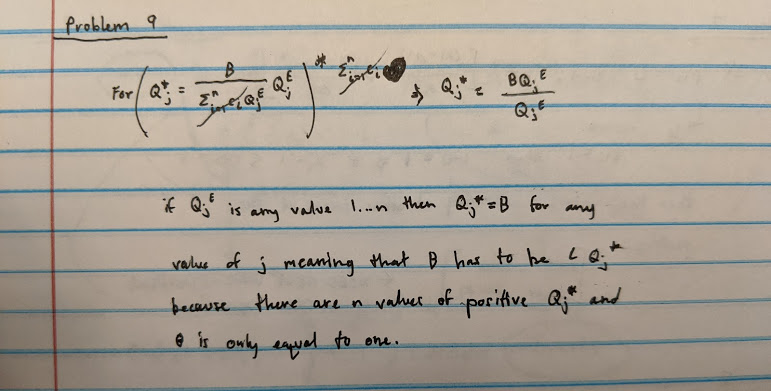

In [257]:
Image(filename='prob9.jpg')

<h2> Question 10 </h2>

<h3> 
A manufacturing firm purchases two components, item 1 and item 2, from the same supplier. Both of these
components are needed for production, and shortages are not allowed as company policy. The fixed setup cost
that the firm incurs for each order is \$20.00, independent of the type and number of items ordered. The following
table outlines the demand, unit cost and holding cost values for the components.
</h3>

<h4> (a) Find the EOQ for Item 1 and Item 2, separately.
 </h4>


In [190]:
K = 20;
D1 = 2000;
D2 = 1000;
c1 = 4;
c2 = 6;
h1 = 1.8;
h2 = 0.8;

EOQ_1 = round(math.sqrt((2*K*D1)/(h1)));
EOQ_2 = round(math.sqrt((2*K*D2)/(h2)));

print("The EOQ's for items 1 and 2 are",EOQ_1,"and",EOQ_2,"respectively.")

The EOQ's for items 1 and 2 are 211 and 224 respectively.


<h4>
(b) Due to the high cost of ordering, and other administrative issues, the purchasing manager wants to coordinate
the replenishments of these components and include both items in an order. Let T denote the time between
these coordinated replenishments. Find the best value of T and the order quantities for the items.

In [212]:
o1 = EOQ_1/D1;
o2 = EOQ_2/D2;
T = o1;
print("Because Item 2 has lower holding cost, we are going to go with Item 1's",
     "EOQ and Time of",T,"because it will cost less to order Item 2 more",
     "frequently and just hold more of that inventory");

Because Item 2 has lower holding cost, we are going to go with Item 1's EOQ and Time of 0.1055 because it will cost less to order Item 2 more frequently and just hold more of that inventory


<h4>
(c) Compare the total unit cost for the ordering values that you found in (a) and (b). Which ordering policy is
better?

In [215]:
#TC = ((FC*D)/Ordering Quant) + ((h*Ordering Quant)/2)
TC1 = round(((K*D1)/EOQ_1)+(h1*(EOQ_1/2)));
TC2 = round(((K*D2)/EOQ_2)+(h2*(EOQ_2/2)));

X = 1/T;
newQ1 = D1/X;
newQ2 = D2/X;

TC3 = round(((K*D1)/newQ1)+(h1*(newQ1/2)));
TC4 = round(((K*D2)/newQ2)+(h2*(newQ2/2)));

#print(TC1,TC2,TC3,TC4,X);
print("The ordering policy that is better is from (a) because it has a lower",
     "EOQ for Item 2 and the same for Item 1 than (b)")

The ordering policy that is better is from (a) because it has a lower EOQ for Item 2 and the same for Item 1 than (b)


<h2> Question 11 </h2>

<h3> 
(EOQ Extension: Allowing Backorders) Derive the optimal ordering quantity (and the backorder level) under
the following assumptions. Note that these are the same assumptions that we make for the basic EOQ model,
except for the assumption that allows backorders.
</h3>
<br/>
<h3>
Assumptions: Constant and deterministic demand; Zero lead time; Single item; Costs, all constant and known;
Setup cost of \$ K per order; Unit purchasing cost of \$ c per unit (\$/unit); Annual holding rate of \$ i per \$ per
year (\$/\$/year); Backorders are allowed, but a penalty cost for each backorder is incurred at \$ b per unit per
year (\$/unit/year).
</h3>
<br/>
<h3>
Find the order quantity, Q∗
, and backorder quantity, B∗
, (note that this is a decision variable in this case, and
represents how “negative” the inventory level would become in each cycle) to minimize the total annual costs.
</h3>


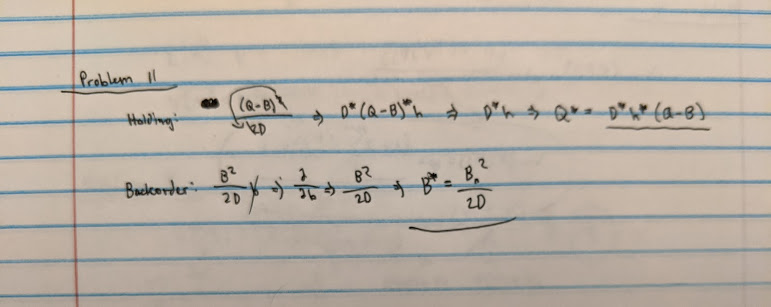

In [258]:
Image(filename='prob11.jpg')

<h2> Question 12 </h2>

<h3> 
Prove that the optimal average holding plus backorder cost per year in the EOQ model with backorders is less
than the optimal average holding cost per year in the EOQ model. Note that the same is clearly true for the
optimal setup cost per year; therefore, both types of costs decrease when we allow backorders.
</h3>


In [ ]:
# Answer:
# Optimal Average Holding plus backorder cost per year in EOQ model is less than
# optimal average holding cost. This is true because for the periods of time 
# where there is no inventory you do not need to pay holding cost until you order
# again and pay the same amount of holding cost because you would have had the 
# same amount of inventory, it is just being sold more strategically. Ex: if you
# charge $10 for holding cost and backorder 50 units then you are saving holding
# cost on all those units and they are more quickly sold when reordered.

<h2> Question 13 </h2>

<h3> 
Suppose that your favorite electronics store maintains an inventory of a certain brand and model of MP3 player.
The store pays the manufacturer \$ 165 for each MP3 player ordered. Each order incurs a fixed cost of \$40 in
order processing, shipping, etc., and requires a 2-week lead time. The store estimates that its cost of capital is
17% per year and it estimates its other holding costs (warehouse space, insurance, etc.) at \$1 per MP3 player
per month. The demand for MP3 players is steady at 40 per week
</h3>

<h4> 
(a) Using the EOQ model calculate the optimal order quantity, reorder point and average cost per year.
 </h4>


In [210]:
#assuming 52 weeks in a year and 
c = 165;
K = 40;
i = .17;
h = (i*c)+1;
D = 52*40;
BiWeekly = D/26;

EOQ = round(math.sqrt((2*K*D)/h));
RI = round(EOQ/D,2);
RP = round((D*RI) + (BiWeekly));
ACPY = round(((K*D)/EOQ)+(c*D)+(h*(EOQ/2)));

print("Optimal Order Quantity =",EOQ,"\nReorder Point =",RP,
     "\nAvg Cost Per Year =",ACPY);

Optimal Order Quantity = 76 
Reorder Point = 163 
Avg Cost Per Year = 345399


<h4>
(b) Now suppose that backorders are allowed, and that each backorder incurs a stockout penalty of $60 per
stockout per year. Using the EOQ model with planned backorders, calculate the optimal order quantity,
optimal stockout level, reorder point, and the average cost per year. How much money would the store save
per year by allowing stockouts, expressed as a percentage?


In [250]:
b = 60;

EOQ_b = round(math.sqrt((2*K*D)/h));
RP_b = round((D*RI) + (BiWeekly));
ACPY_b = round(((K*D)/EOQ)+(c*D)+(h*(EOQ/2)));
OSL = 60;
print("Optimal Order Quantity =",EOQ_b,"\nReorder Point =",RP_b,
     "\nAvg Cost Per Year =",ACPY_b,"\nOptimal Stockout Level =",OSL);
print("The store would save 4% per year by allowing stockouts")

Optimal Order Quantity = 557 
Reorder Point = 1280 
Avg Cost Per Year = 4966559 
Optimal Stockout Level = 60
The store would save 4% per year by allowing stockouts


<h2> Question 14 </h2>

<h3> 
(EOQ Extension: Lost Sales) Suppose that we are allowed to stock out in the EOQ model, but instead of excess
demands being backordered, they are lost. Let x be the fraction of demand that is lost, and let p be the cost
per lost sale. Let c be the cost to order each unit. In the standard EOQ and the EOQ with backorders (in the
previous problem), we could ignore c because each year we order exactly D items per year on average, regardless
of the order quantity Q/ But if some demands are lost, we will not order items to replenish those demands;
therefore, the total per unit ordering cost per year does, in this case, depend on the solution we choose.
</h3>

<h4> 
(a) Formulate the total cost per year as a function of Q and x.
</h4>


In [252]:
print("((K*(D-x))/Q)+(c*(D-x))+(h*(Q/2))-p");

((K*(D-x))/Q)+(c*(D-x))+(h*(Q/2))-p


<h4>
(b) Prove that *see hw doc*
</h4>
<h4>
(c) Give an interpretation of the condition D(p − c) >
√2KDh and explain in words why the optimal value of
x∗
follows the rule given above.
</h4>
<h4>
(d) Part (b) implies that either we meet every demand or we stock out on every demand; that is, x∗
is never
strictly between 0 and 1 (except in the special case in which D(p − c) = √2KDh). This is not the case in
the EOQ with backorders. Explain in words why the two models give different results.
</h4>

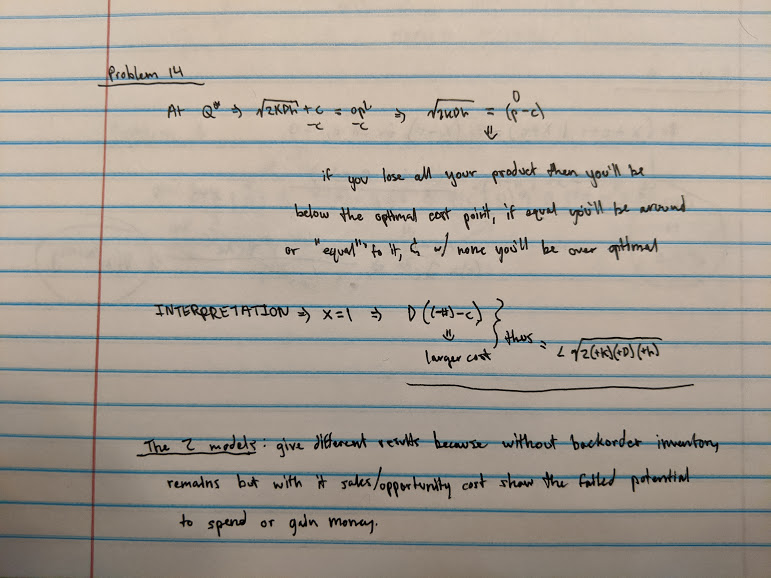

In [259]:
Image(filename='prob14.jpg')

<h2> Question 15 </h2>

<h3> 
(Make or Buy?) Bell Computer is considering of subcontracting the production of a motherboard that is used
in one of the company’s popular computers to an overseas company. Hence, they need the help of an ASU IE
graduate to compare the annual costs of two options: produce internally or buy from the overseas company. The
annual demand for the motherboards is 30,000 units, and the operations of Bell Computer cannot tolerate any
shortages. The holding costs are based on a 25% annual interest rate.
</h3>

<h4> 
(a) If this specific motherboard is produced internally, it will cost \$ 980 each time the machines are setup for
a production run. The unit production cost is estimated to be around \$75 by the accounting department.
Bell Computer can produce the motherboard at a rate of 50,000 per year.
</h4>
<h5>
i. Calculate the economic production lot size for the internal production option.
</h5>
<h5>
ii. What is the length (i.e., duration) of each production run?
</h5>
<h5>
iii. Determine the total annual cost (including annual production costs) if Bell Computer produces the
motherboards internally.
</h5>


In [244]:
D = 30000;
i = .25;
Ki = 980;
ci = 75;
P = 50000;
hi = i*ci;

EPL = round(math.sqrt((2*Ki*D)/(hi*(1-(D/P))))); #this is realizable
print("For i:\n",EPL)

PR = round((30000/50000)*12,2);
print("\nFor ii:\n",PR,"months of the year")
#so it would be 7.2mo / # of runs for the duration of each run

TC_a = round(((Ki*D)/EPL)+(ci*D)+(hi*(EPL/2)));
print("\nFor iii:\n",TC_a)

For i:
 2800

For ii:
 7.2 months of the year

For iii:
 2286750


<h4>
(b) If the motherboards are bought from the overseas company, it will cost \$ 250 each time an order is placed.
The overseas company charges \$125 for each motherboard, but they do promise immediate deliveries
</h4>
<h5>
i. Calculate the economic order quantity for the subcontracting option.
</h5>
<h5>
ii. Determine the total annual cost in this case.

In [245]:
Ko = 250;
co = 125;
ho = i*co;

EOQ_b = round(math.sqrt((2*Ko*D)/ho));
print("For i:\n",EOQ)

TC_b = round(((Ko*D)/EOQ_b)+(co*D)+(ho*(EOQ_b/2)))
print("\nFor ii:\n",TC_b)

For i:
 693

For ii:
 3771651


<h4>
(c) Based on your findings above, should Bell Computer make or buy the motherboard?


In [247]:
Savings = TC_b - TC_a;
print("According to the findings Bell should make the motherboard and save:",
     Savings)

According to the findings Bell should make the motherboard and save: 1484901
